# Modeling

Let's create the Linear Regression Model :D

### Importing all of the libraries needed

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

sns.set()

In [74]:
import matplotlib
print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.26.2
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2


## Load The Data

In [75]:
dataset = pd.read_csv('MELBOURNE_CLEANED_DUMMY.csv')
dataset.head()

,Unnamed: 0,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_MV,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,2,2.5,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,...,1,0,0,0,1,0,0,0,0,0
1,1,2,2.5,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,...,1,0,0,0,1,0,0,0,0,0
2,2,2,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,...,1,0,0,0,1,0,0,0,0,0
3,3,3,2.5,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,...,1,0,0,0,1,0,0,0,0,0
4,4,3,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,...,1,0,0,0,1,0,0,0,0,0


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Columns: 992 entries, Unnamed: 0 to Regionname_Western Victoria
dtypes: float64(10), int64(982)
memory usage: 221.3 MB


## Dependent and Independent Variables

Our target is `log_price`, while our input is other features

In [77]:
target = dataset['log_price']
inputs = dataset.drop(['log_price'], axis=1)

In [78]:
inputs.shape

(29238, 991)

### Scale the Data (Standardization)

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

# Why do we standardize our inputs now? It's because we have changed the categorical variables into dummy variable, which makes the data more linear.

StandardScaler()

In [80]:
scaled_inputs = scaler.transform(inputs)
scaled_inputs

array([[-1.73199157, -1.03509308, -1.34353506, ..., -0.70384437,
        -0.49943346, -0.05556699],
       [-1.73187309, -1.03509308, -1.34353506, ..., -0.70384437,
        -0.49943346, -0.05556699],
       [-1.73175461, -1.03509308, -1.34353506, ..., -0.70384437,
        -0.49943346, -0.05556699],
       ...,
       [ 1.73175461, -1.03509308, -0.72336957, ..., -0.70384437,
         2.00226871, -0.05556699],
       [ 1.73187309,  0.20885659, -0.72336957, ..., -0.70384437,
         2.00226871, -0.05556699],
       [ 1.73199157, -1.03509308, -0.72336957, ..., -0.70384437,
         2.00226871, -0.05556699]])

## Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size= 0.2, random_state = 42)

## Regression Itself

In [82]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [83]:
y_hat = model.predict(x_train)

Text(0, 0.5, 'y_train')

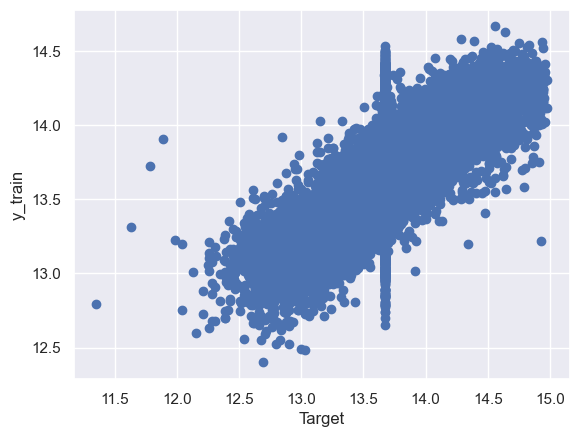

In [84]:
plt.scatter(y_train, y_hat)
plt.xlabel("Target")
plt.ylabel("y_train")

### Residual Plot

It refers to the distribution of the residuals (Differences between the targets and the predictions)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19404\980077577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

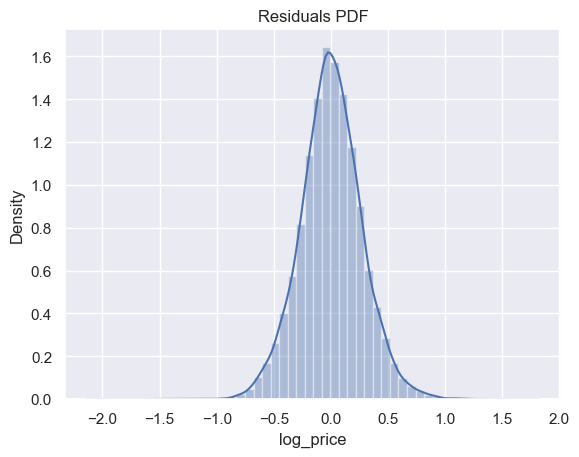

In [85]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF")

Based on OLS assumptions, we know that the errors must be normally distributed with a mean of zero. However, as it's shown on the figure above, we could say its normally distributed

### Evaluating the Regression Model using R-Squared

In [86]:
model.score(x_train, y_train)

0.5926448818238725

#### Calculate the Adjusted R-squared

Adjusted R-Squared Formula

$
R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}
$

Where,
- n = number of observation
- p = number of predictors


In [87]:
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1 - (1 - model.score(x_train, y_train)) * (n - 1) / (n - p - 1)
adjusted_r2

0.5746214457084808

### Finding the Weight and Bias

In [88]:
model.intercept_

42269267682.73469

In [89]:
model_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
model_summary['Weights'] = model.coef_
model_summary

,Features,Weights
0,Unnamed: 0,4.899092e-03
1,Rooms,1.249806e-01
2,Distance,-4.676076e-02
3,Bathroom,9.818166e-03
4,Car,2.141773e-02
...,...,...
986,Regionname_Northern Victoria,-1.812458e+11
987,Regionname_South-Eastern Metropolitan,7.108649e+10
988,Regionname_Southern Metropolitan,1.882123e+11
989,Regionname_Western Metropolitan,-2.052852e+11


As you can see, those weights are some positives and some negatives. What is the meaning of weights?

- **POSITIVE WEIGHTS** = As a feature increases in value, so does the `log_price` or the price of the house, respectively
- **NEGATIVE WEIGHTS** = As a feature increases in value, the `log_price` or the price of the house will also **decreases**

While for the dummies, it means that,
- **POSITIVE WEIGHTS** shows that the respective category is more expensive rather than the benchmark (the first column of the category)
- **NEGATIVE WEIGHTS** the respective category is cheaper rather than the benchmark

## Testing

In [90]:
y_hat_test = model.predict(x_test)

Text(0, 0.5, 'y_hat_test')

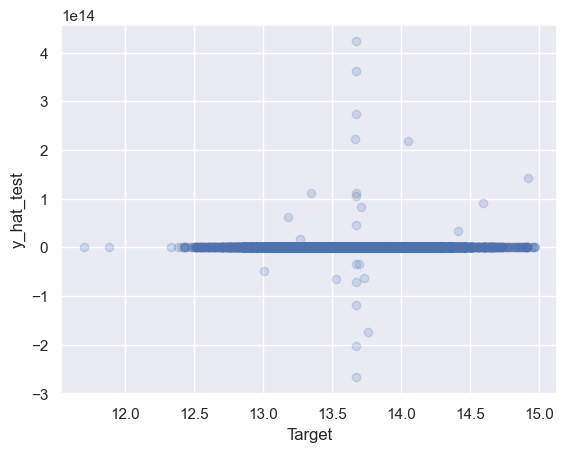

In [91]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Target")
plt.ylabel("y_hat_test")

### Prediction

In [92]:
performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
performance.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19404\2520090089.py:1: RuntimeWarning: overflow encountered in exp
  performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,7.295277e+05
1,1.196317e+06
2,7.634019e+05
3,5.679010e+05
4,inf


Well, as you can see my model is overfitted the training data. Let's try it again with a higher training set size

In [93]:
# 90% Training Set
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(scaled_inputs, target, test_size= 0.1, random_state = 42)

In [94]:
model_over = LinearRegression()
model_over.fit(x_train_over, y_train_over)

LinearRegression()

In [95]:
y_hat_over = model_over.predict(x_train_over)

Text(0, 0.5, 'y_train')

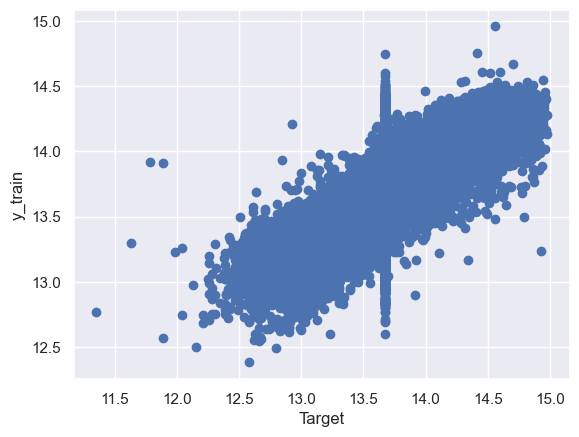

In [96]:
plt.scatter(y_train_over, y_hat_over)
plt.xlabel("Target")
plt.ylabel("y_train")

#### Testing with 90% Training Set

In [97]:
y_hat_over_test = model_over.predict(x_test_over)

Text(0, 0.5, 'y_train')

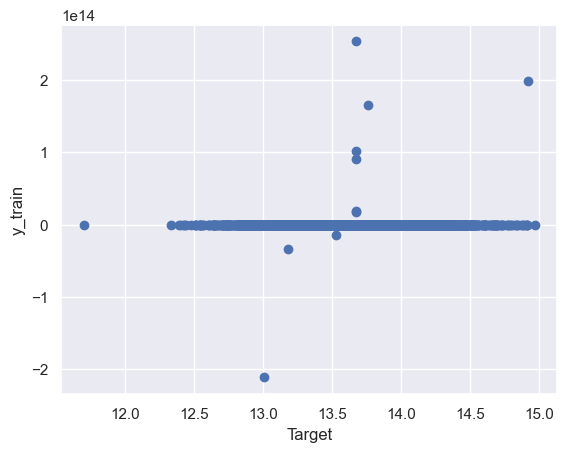

In [98]:
plt.scatter(y_test_over, y_hat_over_test)
plt.xlabel("Target")
plt.ylabel("y_train")

## Summary

In [99]:
y_test = y_test.reset_index(drop=True)

In [100]:
# We will change the logarithmic price to the original price
performance['Target'] = np.exp(y_test)
performance.head()

,Prediction,Target
0,7.295277e+05,985000.0
1,1.196317e+06,1425000.0
2,7.634019e+05,920000.0
3,5.679010e+05,502000.0
4,inf,870000.0


In [101]:
performance['Residuals'] = performance['Target'] - performance['Prediction']
performance.head()

,Prediction,Target,Residuals
0,7.295277e+05,985000.0,2.554723e+05
1,1.196317e+06,1425000.0,2.286825e+05
2,7.634019e+05,920000.0,1.565981e+05
3,5.679010e+05,502000.0,-6.590104e+04
4,inf,870000.0,-inf


In [102]:
performance['Difference%'] = np.absolute(performance['Residuals']/performance['Target']*100)
performance.head()

,Prediction,Target,Residuals,Difference%
0,7.295277e+05,985000.0,2.554723e+05,25.936276
1,1.196317e+06,1425000.0,2.286825e+05,16.047898
2,7.634019e+05,920000.0,1.565981e+05,17.021537
3,5.679010e+05,502000.0,-6.590104e+04,13.127697
4,inf,870000.0,-inf,inf


In [103]:
performance.describe()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Prediction,Target,Residuals,Difference%
count,5.848000e+03,5.848000e+03,5.848000e+03,5848.000000
mean,inf,9.384155e+05,-inf,inf
std,NaN,4.200663e+05,NaN,NaN
min,0.000000e+00,1.210000e+05,-inf,0.002362
25%,6.668717e+05,6.655000e+05,-1.183172e+05,7.905874
50%,8.554393e+05,8.700000e+05,6.590857e+03,16.996526
75%,1.099974e+06,1.100000e+06,1.671605e+05,28.778502
max,inf,3.175000e+06,1.937952e+06,inf


# Result

Based on this result, we could say that the data is not well-suited for regression analysis, and this issue indicates that the data is not linear.

This result is also supported with the R-Squared and the Adj. R-Squared score
- R-Squared         = 0.5926448818238725
- Adj. R-Squared    = 0.5746214457084808

Other than that, we could see on our testing plot using 80% and 90%, which resulted in the same. This means that the model is indeed overfitting for the data, but it is also not linear with the data. Although the model is overfitted, the test data shows us the opposite direction. While the weight (coefficient) represents how the price correlated with other feature, such as increasing or decreasing